In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from numpy import sort
from sklearn.feature_selection import SelectFromModel


# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/opt/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be remove

In [9]:
df=pd.read_csv('adult_income.csv')
df.drop_duplicates(keep='first',inplace=True)
df.drop(index=df[(df[' Work-class']==' ?')|(df[' Occupation']==' ?') |(df[' Native-country']==' ?')].index,inplace=True)
df['income']=df[' Income'].map(lambda x: 0 if x ==' <=50K' else 1)
df.drop(" Income",axis=1,inplace=True)
print(df.shape)

(30139, 15)


In [11]:
# One-hot Encoding for categorical data (native-country 0 for US,1 for others)
df=pd.get_dummies(df, columns=[' Work-class'],drop_first=False)
df=pd.get_dummies(df, columns=[' Marital-status'],drop_first=False)
df=pd.get_dummies(df, columns=[' Occupation'],drop_first=False)
df=pd.get_dummies(df, columns=[' Relationship'],drop_first=False)
df=pd.get_dummies(df, columns=[' Race'],drop_first=False)
df=pd.get_dummies(df, columns=[' Sex'],drop_first=False)
df[' Native-country']=df[' Native-country'].map(lambda x: 0 if x ==' United-States' else 1)

In [18]:
# Eduction and Eduction_num are essentially duplicate
df.drop(' Education', axis=1, inplace=True)

In [20]:
print(df.shape)
df['Capital'] = df[' Capital-gain'] + df[' Capital-loss']
df.drop(' Capital-gain', axis=1, inplace=True)
df.drop(' Capital-loss', axis=1, inplace=True)
print(df.shape)

(30139, 49)
(30139, 48)


In [21]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[[' fnlwgt','Capital',' Hours-per-week']])
df[[' fnlwgt','Capital',' Hours-per-week']] = scaler.transform(df[[' fnlwgt','Capital',' Hours-per-week']])

In [24]:
df.shape

(30139, 48)

## feature selection

In [25]:
dataX=df.drop('income',axis=1)
dataY=df['income']

In [74]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
importance_f=f_classif(dataX, dataY) 
feature_importance=pd.DataFrame(importance_f,columns=dataX.columns,index=['f-statistics','p-value']).T.sort_values(by='f-statistics',ascending=False)

In [75]:
feature_importance=feature_importance.reset_index().rename(columns={'index':'feature'})

In [76]:
feature_importance

,feature,f-statistics,p-value
0,Marital-status_ Married-civ-spouse,7455.209,0.000
1,Relationship_ Husband,5779.445,0.000
2,Education-num,3820.265,0.000
3,Marital-status_ Never-married,3435.551,0.000
4,Age,1875.009,0.000
5,Capital,1674.887,0.000
6,Hours-per-week,1674.573,0.000
7,Relationship_ Own-child,1625.722,0.000
8,Sex_ Female,1484.467,0.000
9,Sex_ Male,1484.467,0.000


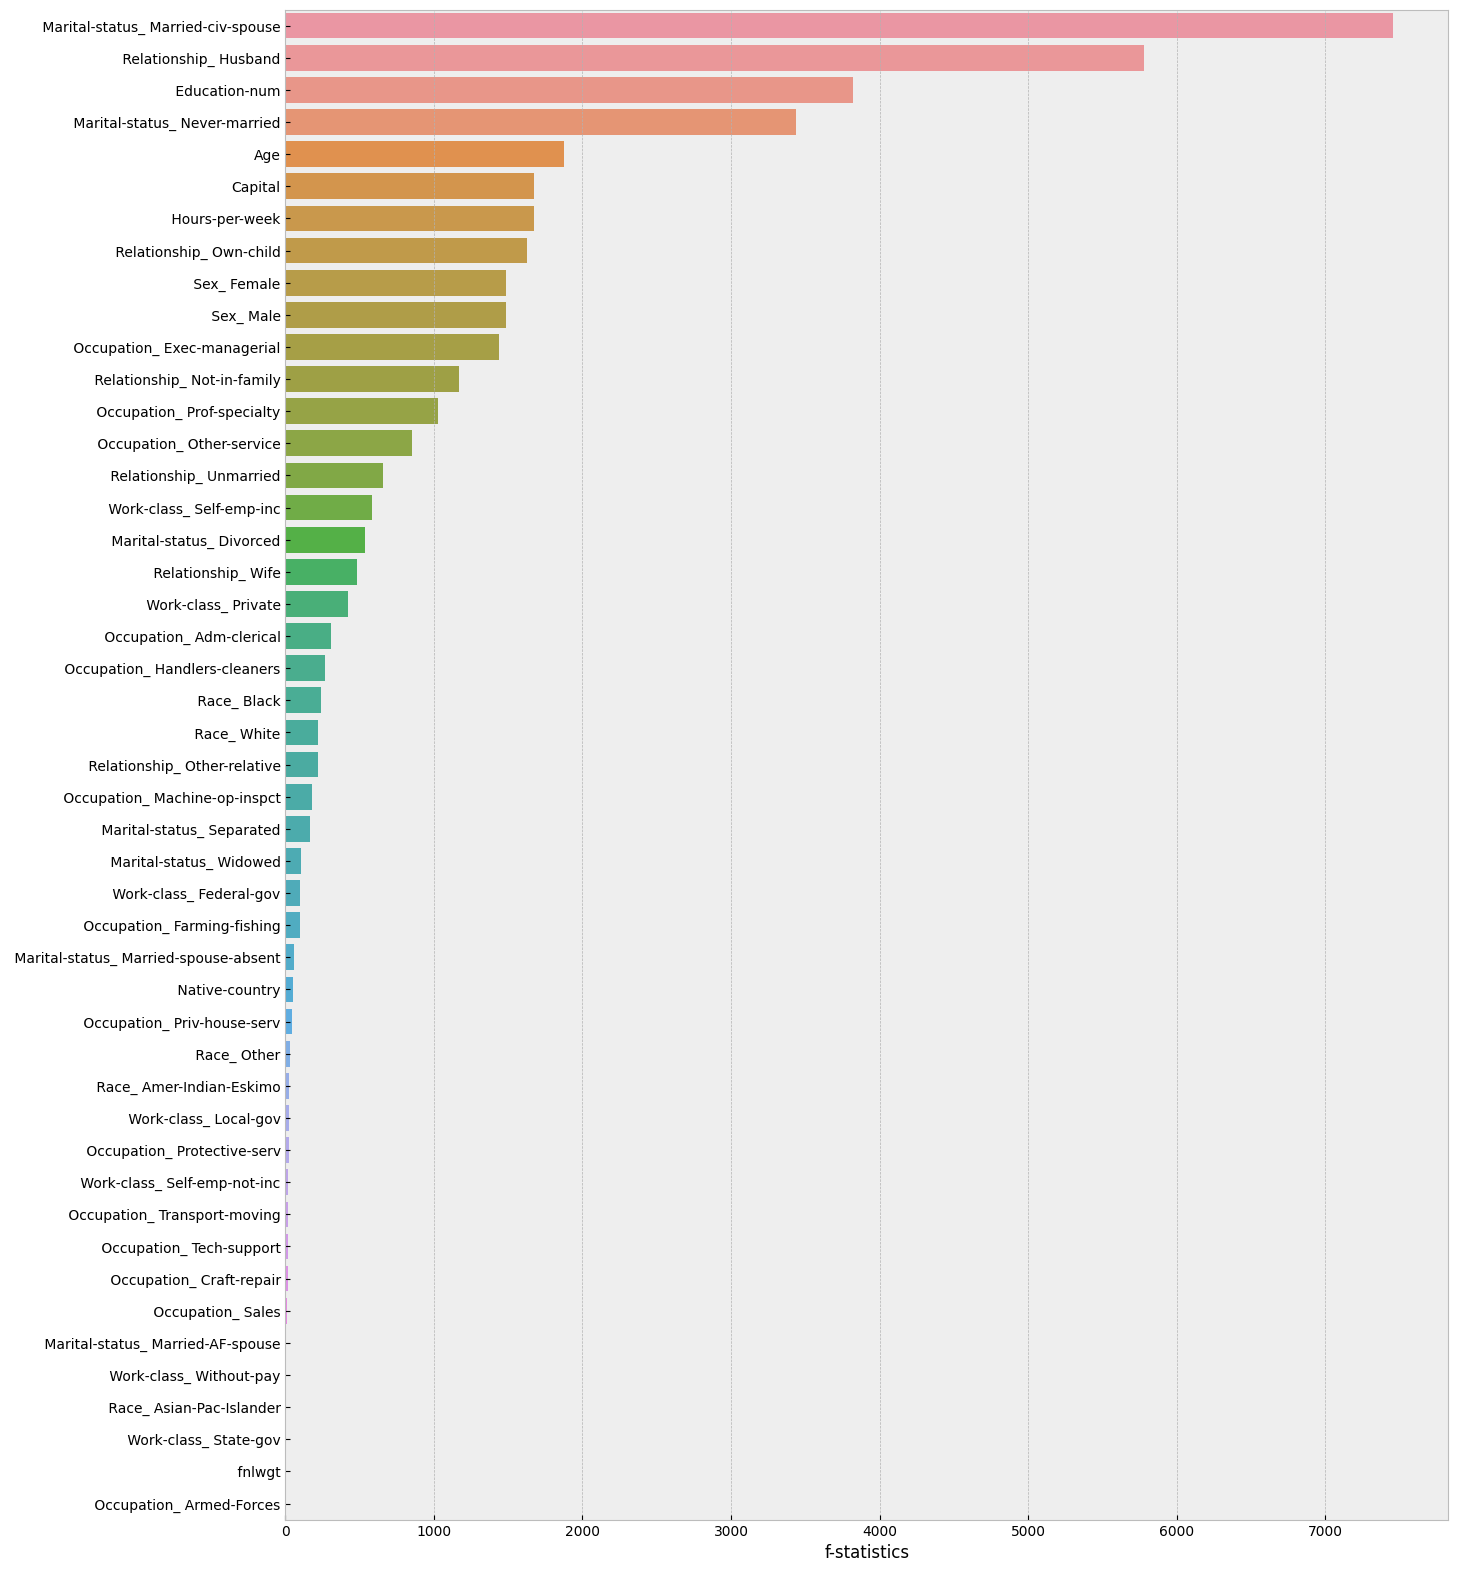

In [61]:
plt.figure(figsize=(15,20),dpi=100)
sns.barplot(y=feature_importance.index,x=feature_importance['f-statistics'])
plt.show()

In [79]:
# maybe choose the first 28 features
chosen=list(feature_importance.feature[0:29].values)

# PCA after feature selection

In [165]:
dataX_pca = dataX[chosen].copy()
variance_explained = 0.95
pca = PCA(variance_explained)
principalComponents = pca.fit(dataX_pca)
print(principalComponents.explained_variance_ratio_)
principalComponents = principalComponents.transform(dataX_pca)

[0.93927619 0.0357592 ]


In [166]:
principalDf = pd.DataFrame(data = principalComponents)
# # Concatenate dataframe with 'shares_bin2' column
df_pca = pd.merge(principalDf, df[['income']].reset_index(drop='index'),right_index=True,left_index=True)
df_pca

,0,1,income
0,0.567,-2.864,0
1,11.588,-2.623,0
2,-0.455,1.150,0
3,14.539,3.288,0
4,-10.409,-2.983,0
...,...,...,...
30134,-11.419,-1.949,0
30135,1.566,1.155,1
30136,19.531,1.377,0
30137,-16.492,1.109,0


In [100]:
n_pcs=pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names  = chosen
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
pd.DataFrame(dic.items())

# PCA with no feature selection

In [161]:
dataX_pca_nofs = dataX.copy()
variance_explained = 0.95
pca = PCA(variance_explained)
principalComponents = pca.fit(dataX_pca_nofs)
print(principalComponents.explained_variance_ratio_)
principalComponents = principalComponents.transform(dataX_pca_nofs)

[0.9309868  0.03548639]


In [164]:
principalDf = pd.DataFrame(data = principalComponents)
# # Concatenate dataframe with 'shares_bin2' column
df_pca_nofs = pd.merge(principalDf, df[['income']].reset_index(drop='index'),right_index=True,left_index=True)
df_pca_nofs

,0,1,income
0,0.567,-2.864,0
1,11.588,-2.623,0
2,-0.455,1.150,0
3,14.539,3.288,0
4,-10.409,-2.983,0
...,...,...,...
30134,-11.419,-1.949,0
30135,1.566,1.155,1
30136,19.531,1.377,0
30137,-16.492,1.109,0


In [167]:
n_pcs=pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names  = chosen
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
pd.DataFrame(dic.items())


,0,1
0,PC0,Age
1,PC1,Education-num


## Comparison

In [104]:
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition, ensemble
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
import xgboost
import lightgbm as lgb


In [153]:
def model(X_train, X_test, y_train, y_test):
    models = {'knn': KNeighborsClassifier(),
            'lr':linear_model.LogisticRegression(),
            'rf':ensemble.RandomForestClassifier(),
            'xgboost':xgboost.XGBClassifier(),
            'lighGBM':lgb.LGBMClassifier()
            }

    y_predicts = pd.DataFrame()
    for name, model in models.items():
        clf = model.fit(X_train, y_train)
        y_train_pred = clf.predict(X_train)
        acc = metrics.accuracy_score(y_train, y_train_pred)
        print('Model: {} | train accuracy: {:.4f}'.format(name, acc))
        y_test_pred = clf.predict(X_test) #_topic
        acc_test = metrics.accuracy_score(y_test, y_test_pred)
        print('Test: Model: {} | Test accuracy: {:.4f}'.format(name, acc_test))
        y_predicts.loc[name,'train accuracy']=acc
        y_predicts.loc[name,'test accuracy']=acc_test
    return y_predicts

In [131]:
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY,
                                                    stratify=dataY, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [154]:
result_no=model(x_train, x_test, y_train, y_test)

Model: knn | train accuracy: 0.8721
Test: Model: knn | Test accuracy: 0.8210


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: lr | train accuracy: 0.8477
Test: Model: lr | Test accuracy: 0.8432
Model: rf | train accuracy: 1.0000
Test: Model: rf | Test accuracy: 0.8510


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model: xgboost | train accuracy: 0.9073
Test: Model: xgboost | Test accuracy: 0.8643


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model: lighGBM | train accuracy: 0.8879
Test: Model: lighGBM | Test accuracy: 0.8676


In [108]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(dataX[chosen], dataY,
                                                    stratify=dataY, 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [155]:
result_fs=model(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

Model: knn | train accuracy: 0.8707
Test: Model: knn | Test accuracy: 0.8227
Model: lr | train accuracy: 0.8459


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test: Model: lr | Test accuracy: 0.8439
Model: rf | train accuracy: 0.9674
Test: Model: rf | Test accuracy: 0.8441


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model: xgboost | train accuracy: 0.8888
Test: Model: xgboost | Test accuracy: 0.8623
Model: lighGBM | train accuracy: 0.8803
Test: Model: lighGBM | Test accuracy: 0.8656


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [156]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca.drop('income',axis=1), df_pca['income'],
                                                    stratify=df_pca['income'], 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [157]:
result_fs_pca=model(x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Model: knn | train accuracy: 0.8564
Test: Model: knn | Test accuracy: 0.7887
Model: lr | train accuracy: 0.7815
Test: Model: lr | Test accuracy: 0.7782
Model: rf | train accuracy: 0.9674
Test: Model: rf | Test accuracy: 0.7860


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model: xgboost | train accuracy: 0.8567
Test: Model: xgboost | Test accuracy: 0.8089
Model: lighGBM | train accuracy: 0.8251
Test: Model: lighGBM | Test accuracy: 0.8127


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [169]:
x_train_pca_nofs, x_test_pca_nofs, y_train_pca_nofs, y_test_pca_nofs = train_test_split(df_pca_nofs.drop('income',axis=1), df_pca_nofs['income'],
                                                    stratify=df_pca_nofs['income'], 
                                                  random_state=42, 
                                                  test_size=0.2, shuffle=True)

In [171]:
result_pca=model(x_train_pca_nofs, x_test_pca_nofs, y_train_pca_nofs, y_test_pca_nofs)

Model: knn | train accuracy: 0.8564
Test: Model: knn | Test accuracy: 0.7887
Model: lr | train accuracy: 0.7815
Test: Model: lr | Test accuracy: 0.7782
Model: rf | train accuracy: 0.9675
Test: Model: rf | Test accuracy: 0.7882


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Model: xgboost | train accuracy: 0.8567
Test: Model: xgboost | Test accuracy: 0.8089
Model: lighGBM | train accuracy: 0.8251
Test: Model: lighGBM | Test accuracy: 0.8127


/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:173: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [159]:
result_no

,train accuracy,test accuracy
knn,0.872,0.821
lr,0.848,0.843
rf,1.000,0.851
xgboost,0.907,0.864
lighGBM,0.888,0.868


In [158]:
result_fs

,train accuracy,test accuracy
knn,0.871,0.823
lr,0.846,0.844
rf,0.967,0.844
xgboost,0.889,0.862
lighGBM,0.880,0.866


In [172]:
result_pca

,train accuracy,test accuracy
knn,0.856,0.789
lr,0.782,0.778
rf,0.967,0.788
xgboost,0.857,0.809
lighGBM,0.825,0.813


In [160]:
result_fs_pca

,train accuracy,test accuracy
knn,0.856,0.789
lr,0.782,0.778
rf,0.967,0.786
xgboost,0.857,0.809
lighGBM,0.825,0.813


In [175]:
list(result_no.index)

['knn', 'lr', 'rf', 'xgboost', 'lighGBM']

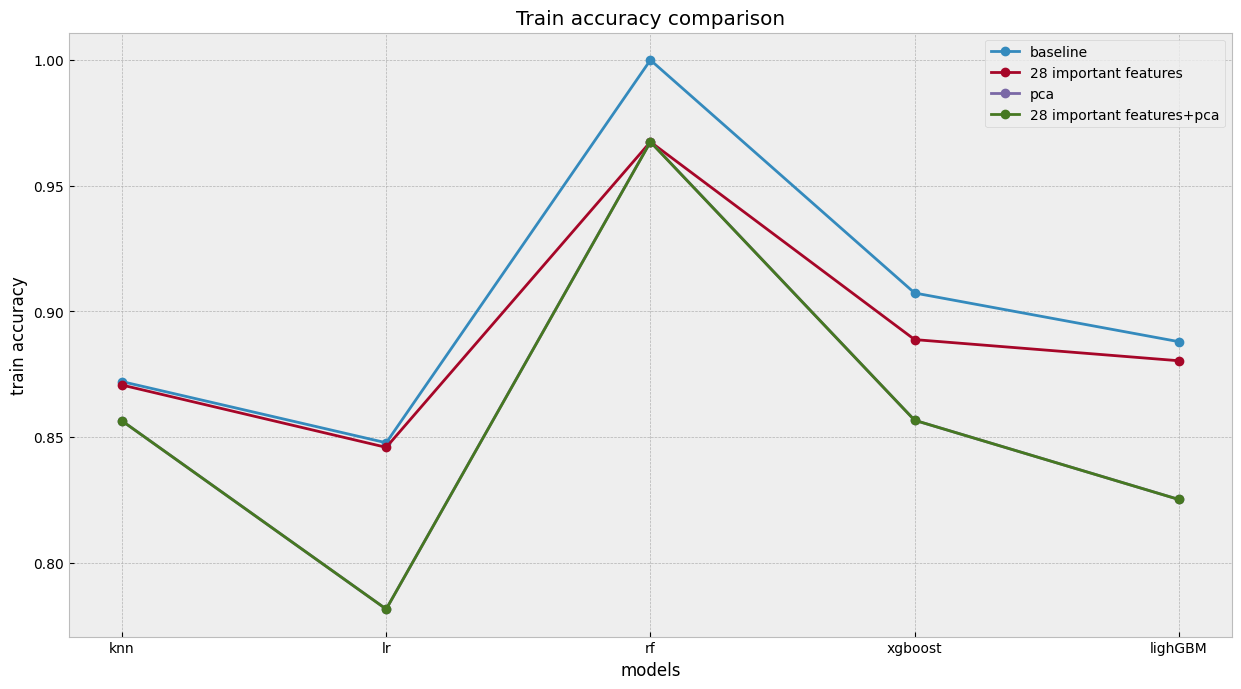

In [187]:
plt.figure(figsize=(15,8),dpi=100)
plt.plot(result_no['train accuracy'],marker='o',label='baseline')
plt.plot(result_fs['train accuracy'],marker='o',label='28 important features')
plt.plot(result_pca['train accuracy'],marker='o',label='pca')
plt.plot(result_fs_pca['train accuracy'],marker='o',label='28 important features+pca')
plt.legend(loc='best')
plt.ylabel('train accuracy')
plt.xlabel('models')
plt.title('Train accuracy comparison')
plt.show()

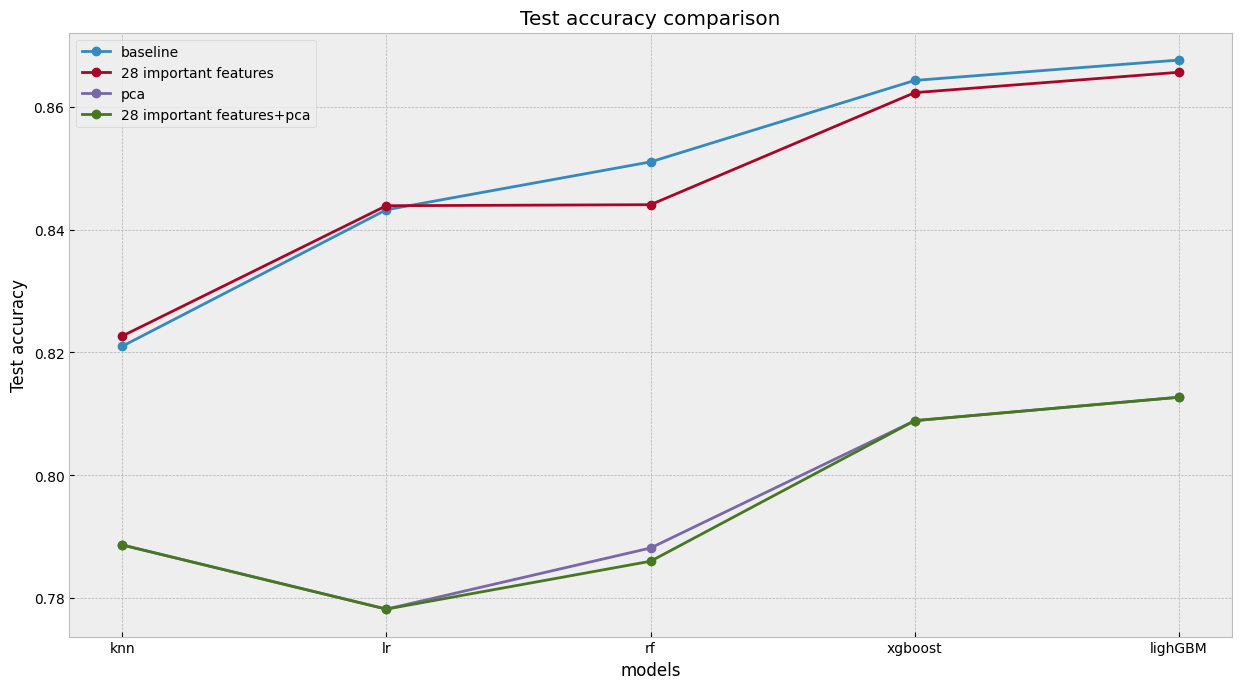

In [188]:
plt.figure(figsize=(15,8),dpi=100)
plt.plot(result_no['test accuracy'],marker='o',label='baseline')
plt.plot(result_fs['test accuracy'],marker='o',label='28 important features')
plt.plot(result_pca['test accuracy'],marker='o',label='pca')
plt.plot(result_fs_pca['test accuracy'],marker='o',label='28 important features+pca')
plt.legend(loc='best')
plt.ylabel('Test accuracy')
plt.xlabel('models')
plt.title('Test accuracy comparison')
plt.show()